In [1]:
import matplotlib.pyplot as plt

import  torch.utils.data as data_utils
import torch
import torch.nn as nn
from torchvision.models import inception
from torchvision.models import Inception3
import numpy as np
from torch.autograd import Variable
import torch.nn.functional as F
from torchvision import datasets,models,transforms
import torch.optim as optim
import copy

import numpy as np
import random
import gc


import torch
import numpy as np
from torch.autograd import Variable

import sys
import os
import scipy
import cv2
from PIL import Image
from nndev import train_model,imshow,lr_scheduler,load_data

In [2]:
path = '/data/gabriel/OCR/OCR_data/'
dsets,dset_loaders,dset_sizes = load_data(path,b_size=10)
#img = plt.imread(path+'0/98.png')

In [3]:
from torch.autograd import Variable
#img=np.reshape(img,(1,1,30,30,3))
#img = Variable(torch.Tensor(img))

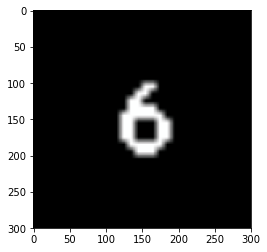

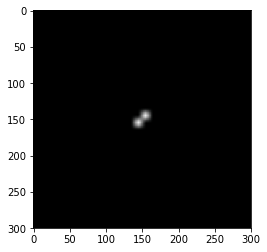

torch.Size([10, 3, 300, 300])

  6
 14
  3
  3
 13
  2
  3
 14
  5
 12
[torch.LongTensor of size 10]



In [4]:


for i in dset_loaders['train']:
    a,b = i
    
    imshow(a[0,:,:,:])
    imshow(a[1,:,:,:])
    print(a.size())
    print(b)
    break

In [11]:
inception = models.inception_v3(pretrained=True)
resnet1 = models.resnet18(pretrained=True)
resnet1.fc = nn.Linear(resnet1.fc.in_features,15)

optimizer_ft = optim.SGD(resnet1.parameters(),lr=0.001,momentum=0.9)
criterion = nn.CrossEntropyLoss()


num_f = inception.fc.in_features
inception.fc = nn.Linear(num_f,15)
op2 = optim.SGD(inception.parameters(),lr=0.001,momentum=0.9)

In [12]:
model_res_ft,conf = train_model(resnet1,optimizer_ft,criterion,lr_scheduler,path,10,30, 0,None)


Epoch =  0
lr =  0.001
train

traintrain Loss: 0.2522 Acc: 0.1778
[[3 0 0 0 0 0 0 0 0 2 0 0 1 0 0]
 [1 0 0 0 1 0 0 0 0 1 0 0 3 0 0]
 [1 0 0 1 0 2 2 0 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 2 0 0 1 0 0 1 0 0]
 [0 0 0 0 1 0 5 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 2 0 0 1 0 0 2 0 0]
 [1 0 0 0 0 0 1 0 0 1 0 0 3 0 0]
 [0 0 2 1 0 0 0 1 0 1 0 0 1 0 0]
 [3 0 1 0 0 0 0 0 1 0 0 0 1 0 0]
 [1 0 0 2 0 0 2 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 3 0 3 0 0]
 [2 0 1 0 0 0 0 0 0 0 0 1 2 0 0]
 [2 0 0 0 0 0 1 0 0 0 2 0 1 0 0]
 [1 0 0 0 0 2 3 0 0 0 0 0 0 0 0]
 [1 0 0 1 0 2 0 1 0 0 0 0 0 0 1]]
val

valval Loss: 0.2577 Acc: 0.1875
[[ 4  6  0  0  2  0  0  0  0  0  0  0  4  0  0]
 [ 0  5  0  0  1  0  0  4  0  0  0  0  5  0  1]
 [ 0 12  0  0  0  0  0  0  0  0  0  0  2  0  2]
 [ 2  1  0  1  5  0  0  1  6  0  0  0  0  0  0]
 [ 5  3  0  0  0  0  0  6  0  1  0  0  0  0  1]
 [ 1  0  0  0  0  0  3  2  2  0  8  0  0  0  0]
 [ 0  8  0  0  0  0  5  0  1  0  0  1  1  0  0]
 [ 0  0  0  0  0  0  0  6  5  0  0  0  5  0  0]
 [ 0  0  0  0  0 

In [13]:
model_inc_ft,conf = train_model(inception,op2,criterion,lr_scheduler,path,10,30, 0,'Inception')

Epoch =  0
lr =  0.001
train

traintrain Loss: 0.2730 Acc: 0.0444
[[0 1 0 0 2 0 1 2 0 0 0 0 0 0 0]
 [1 0 0 1 0 0 0 2 1 0 1 0 0 0 0]
 [1 1 0 0 1 0 0 0 1 0 0 0 2 0 0]
 [2 0 2 0 2 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 1 0 0 2 0 0 0 0 1 0 0]
 [0 0 0 2 0 0 0 1 0 0 1 2 0 0 0]
 [1 0 0 1 1 1 0 2 0 0 0 0 0 0 0]
 [1 0 1 0 1 0 0 0 1 0 0 1 0 1 0]
 [2 0 0 0 1 0 0 1 1 0 0 0 1 0 0]
 [3 1 0 0 2 0 0 0 0 0 0 0 0 0 0]
 [3 0 0 1 0 0 0 0 1 1 0 0 0 0 0]
 [0 0 1 1 2 0 0 1 0 0 1 0 0 0 0]
 [0 0 1 1 0 0 0 1 0 0 2 0 1 0 0]
 [0 0 0 3 2 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 3 0 0 0 1 0 1 1]]
val

valval Loss: 0.2709 Acc: 0.0542
[[ 4  0  0  0  0  0  0  9  0  0  0  1  0  2  0]
 [ 1  3  0  0  0  0  0 10  0  0  0  2  0  0  0]
 [ 0  5  0  5  2  0  0  1  0  1  1  1  0  0  0]
 [ 0  1  0  1  0  1  0  5  0  4  0  3  0  1  0]
 [ 0  0  0  5  3  0  0  0  0  0  0  3  0  5  0]
 [ 0  0  0  5  0  0  0  8  0  0  0  3  0  0  0]
 [ 0  4  0  3  0  0  0  2  2  0  3  0  0  2  0]
 [ 2  3  0  4  0  1  0  1  0  0  1  4  0  0  0]
 [ 1  0  0  0  0 

In [ ]:
#num_f = inception.fc.in_features
#inception.fc = nn.Linear(num_f,2)
num_f = resnet.fc.in_features
resnet.fc = nn.Linear(num_f,2)
#alex =models.alexnet(pretrained=True)
#num_f = alex.classifier[6].in_features
#print (alex.classifier[6].parameters) #= nn.Linear(num_f,2)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(resnet.parameters(),lr = 0.001,momentum=0.9)
print(num_f)
#print(resnet)
#print(alex.classifier[6].out_features)

#alex.classifier[6].out_features = 2
#help(alex.classifier[6]) #= nn.Linear(num_f,2)

#print(alex.classifier[6].out_features)


#print (alex.classifier[6].parameters) #= nn.Linea

In [ ]:
train_model(criterion,resnet,optimizer,lr_scheduler,dset_loaders, n_epochs=30,n=None,n_gpu=0)

In [ ]:
alex.classifier[6] = nn.Linear(num_f,2)

In [ ]:
for i in alex.features.parameters():
    i.requires_grad = False
    #print(i.requires_grad)
    #print('--')

In [ ]:
for i in alex.features.parameters():
    print(i.requires_grad)

In [ ]:
print(alex)

In [ ]:


for idx,i in enumerate(alex.classifier):
    #print(i)
    #print(idx)
    if(idx == 6):
        del(i)
        #alex.
        i = nn.Linear(4096,2)
        print(alex)
    print('--')
    #break

In [ ]:
m = nn.Sequential(*list(alex.modules())[:-10])

In [ ]:
print(m)

In [ ]:
print(nn.Sequential(*list(alex.modules())))

In [ ]:
print(alex)

In [ ]:

del alex.classifier

In [ ]:

#if('classifier' not in alex):
    #alex['classifier'] = None
alex.append(nn.Sequential(nn.Dropout(p=0.5),
                                    nn.Linear(9216,4096),
                                    nn.Relu(),
                                    nn.Dropout(p=0.5),
                                    nn.Linear(4096,4096),
                                    nn.Relu(),
                                    nn.Linear(4096,2)
                                   ))

In [ ]:
for i in alex.named_modules():
    print(i)
    print('--')

In [ ]:
print(help(alex.classifier[6]))

In [ ]:
print(alex.classifier[6]) 

In [ ]:
print(resnet.fc)

In [ ]:
optimizer = optim.SGD(inception.parameters(),lr = 0.001,momentum=0.9)

In [ ]:
m = train_model(resnet,optimizer,lr_scheduler,dset_loaders,n_epochs=20,n_gpu=1)

In [ ]:
print(torch.cuda.is_available())